<a href="https://colab.research.google.com/github/melivitra/Python-Prep/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerías
import pandas as pd
import seaborn as sns

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'sample_data']


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,Unnamed: 0,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   286 non-null    int64 
 1   Class        286 non-null    object
 2   Age          286 non-null    object
 3   Menopause    286 non-null    object
 4   Tumor-size   286 non-null    object
 5   Inv-nodes    286 non-null    object
 6   Node-caps    286 non-null    object
 7   Deg-malig    286 non-null    int64 
 8   Breast       286 non-null    object
 9   Breast-quad  286 non-null    object
 10  Irradiat     286 non-null    object
dtypes: int64(2), object(9)
memory usage: 24.7+ KB


In [ ]:
df2 = df[['Class' , 'Age', 'Menopause', 'Node-caps', 'Deg-malig' , 'Irradiat']].copy()

In [ ]:
df2.head

<bound method NDFrame.head of                     Class    Age Menopause Node-caps  Deg-malig Irradiat
0    no-recurrence-events  30-39   premeno        no          3       no
1    no-recurrence-events  40-49   premeno        no          2       no
2    no-recurrence-events  40-49   premeno        no          2       no
3    no-recurrence-events  60-69      ge40        no          2       no
4    no-recurrence-events  40-49   premeno        no          2       no
..                    ...    ...       ...       ...        ...      ...
281     recurrence-events  30-39   premeno        no          2       no
282     recurrence-events  30-39   premeno        no          3      yes
283     recurrence-events  60-69      ge40        no          1       no
284     recurrence-events  40-49      ge40        no          3       no
285     recurrence-events  50-59      ge40        no          3       no

[286 rows x 6 columns]>

In [ ]:
recurrence = {'no-recurrence-events':1 , 'recurrence-events':0}

In [ ]:
df3 = df2['Class'].map(recurrence)

In [ ]:
df2 = df2.drop(['Class'], axis = 1)

In [ ]:
df2 = pd.concat([df2 , df3], axis = 1)

In [ ]:
df2.head()

,Age,Menopause,Node-caps,Deg-malig,Irradiat,Class
0,30-39,premeno,no,3,no,1
1,40-49,premeno,no,2,no,1
2,40-49,premeno,no,2,no,1
3,60-69,ge40,no,2,no,1
4,40-49,premeno,no,2,no,1


In [ ]:
df4 = pd.get_dummies(df2)
df4.head()

,Deg-malig,Class,Age_20-29,Age_30-39,Age_40-49,Age_50-59,Age_60-69,Age_70-79,Menopause_ge40,Menopause_lt40,Menopause_premeno,Node-caps_?,Node-caps_no,Node-caps_yes,Irradiat_no,Irradiat_yes
0,3,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,2,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,2,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,2,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,2,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
#Separamos los datos de entrada de los de salida
x =df4.drop('Class', axis=1)
y =df4['Class']

In [ ]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split

#Me quedo con 30% para test y 70% para train
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle = True, random_state=44)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
trees = DecisionTreeClassifier(max_depth=5, random_state = 42) #Creamos el modelo

In [ ]:
#Entrenamos el modelo
trees.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_train_pred = trees.predict(x_train) #Prediccion en Train
y_test_pred = trees.predict(x_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.79
% de aciertos sobre el set de evaluación: 0.7209302325581395


In [ ]:
print("Longitud de y_test:", len(y_test))
print("Longitud de y_test_pred:", len(y_test_pred))


Longitud de y_test: 101
Longitud de y_test_pred: 86


In [ ]:
import pandas as pd

# Crear un DataFrame con valores reales y predichos
data = {'Real': y_test, 'Predicho': y_test_pred}
df7 = pd.DataFrame(data)

# Imprimir el DataFrame
print(df7)


     Real  Predicho
36      1         1
12      1         1
28      1         1
51      1         1
125     1         0
..    ...       ...
87      1         1
83      1         1
190     1         1
102     1         1
137     1         1

[86 rows x 2 columns]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5)

# Realizar la búsqueda en cuadrícula
grid_search.fit(x_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)







Mejores hiperparámetros: {'C': 0.1, 'kernel': 'rbf'}


In [ ]:
# Crear un modelo SVM con los mejores hiperparámetros
best_svm_model = SVC(C=0.1, kernel='rbf')

# Entrenar el modelo con los datos de entrenamiento
best_svm_model.fit(x_train, y_train)

# Evaluar el modelo en los datos de prueba
accuracy = best_svm_model.score(X_test, y_test)
print("Precisión en datos de prueba:", accuracy)

Precisión en datos de prueba: 0.7558139534883721


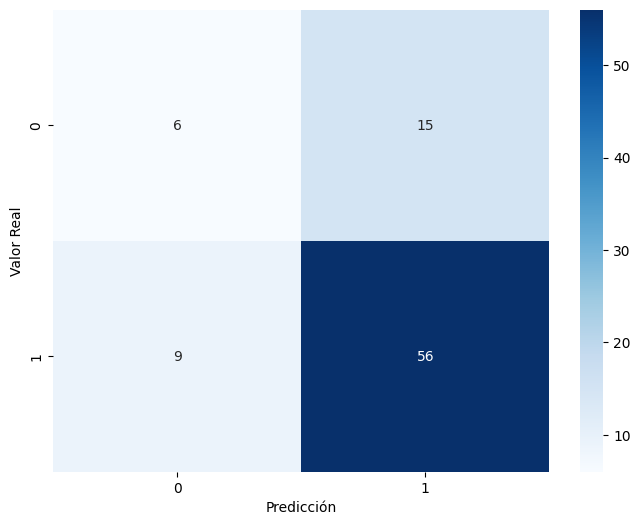

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las etiquetas únicas de las clases
class_names = np.unique(y_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
